### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [ ]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [ ]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = './glove.6B.50d.txt'
emb_dim = 50

In [ ]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    emb_dict = {}
    with open(path, 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], 'float32')
            emb_dict[word] = vector
    return emb_dict

In [ ]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [ ]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [ ]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [ ]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [ ]:
# Defining the method to plot the embeddings based on the given words list
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    # NOTE: the parameters em_path and emb_dim are not used in this function
    #       This is because the embeddings_dict is already created and passed as a parameter

    # Extract embeddings for the specified words
    words = []
    vectors = []
    for word in words2show:
        if word in embeddings_dict:
            words.append(word)
            vectors.append(embeddings_dict[word])

    # Convert to numpy array, this is required for dimensionality reduction
    vectors = np.array(vectors)

    # Reduce dimensionality using the specified method, default is PCA
    reduced_embeddings = func(n_components=2).fit_transform(vectors)

    # Plot the embeddings using 2D scatter plot
    # The relative position of the words in the plot indicates the similarity between them
    plt.figure(figsize=(25, 15))
    for i, word in enumerate(words):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title(f'Word Embeddings Visualization using {func.__name__}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()


In [ ]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


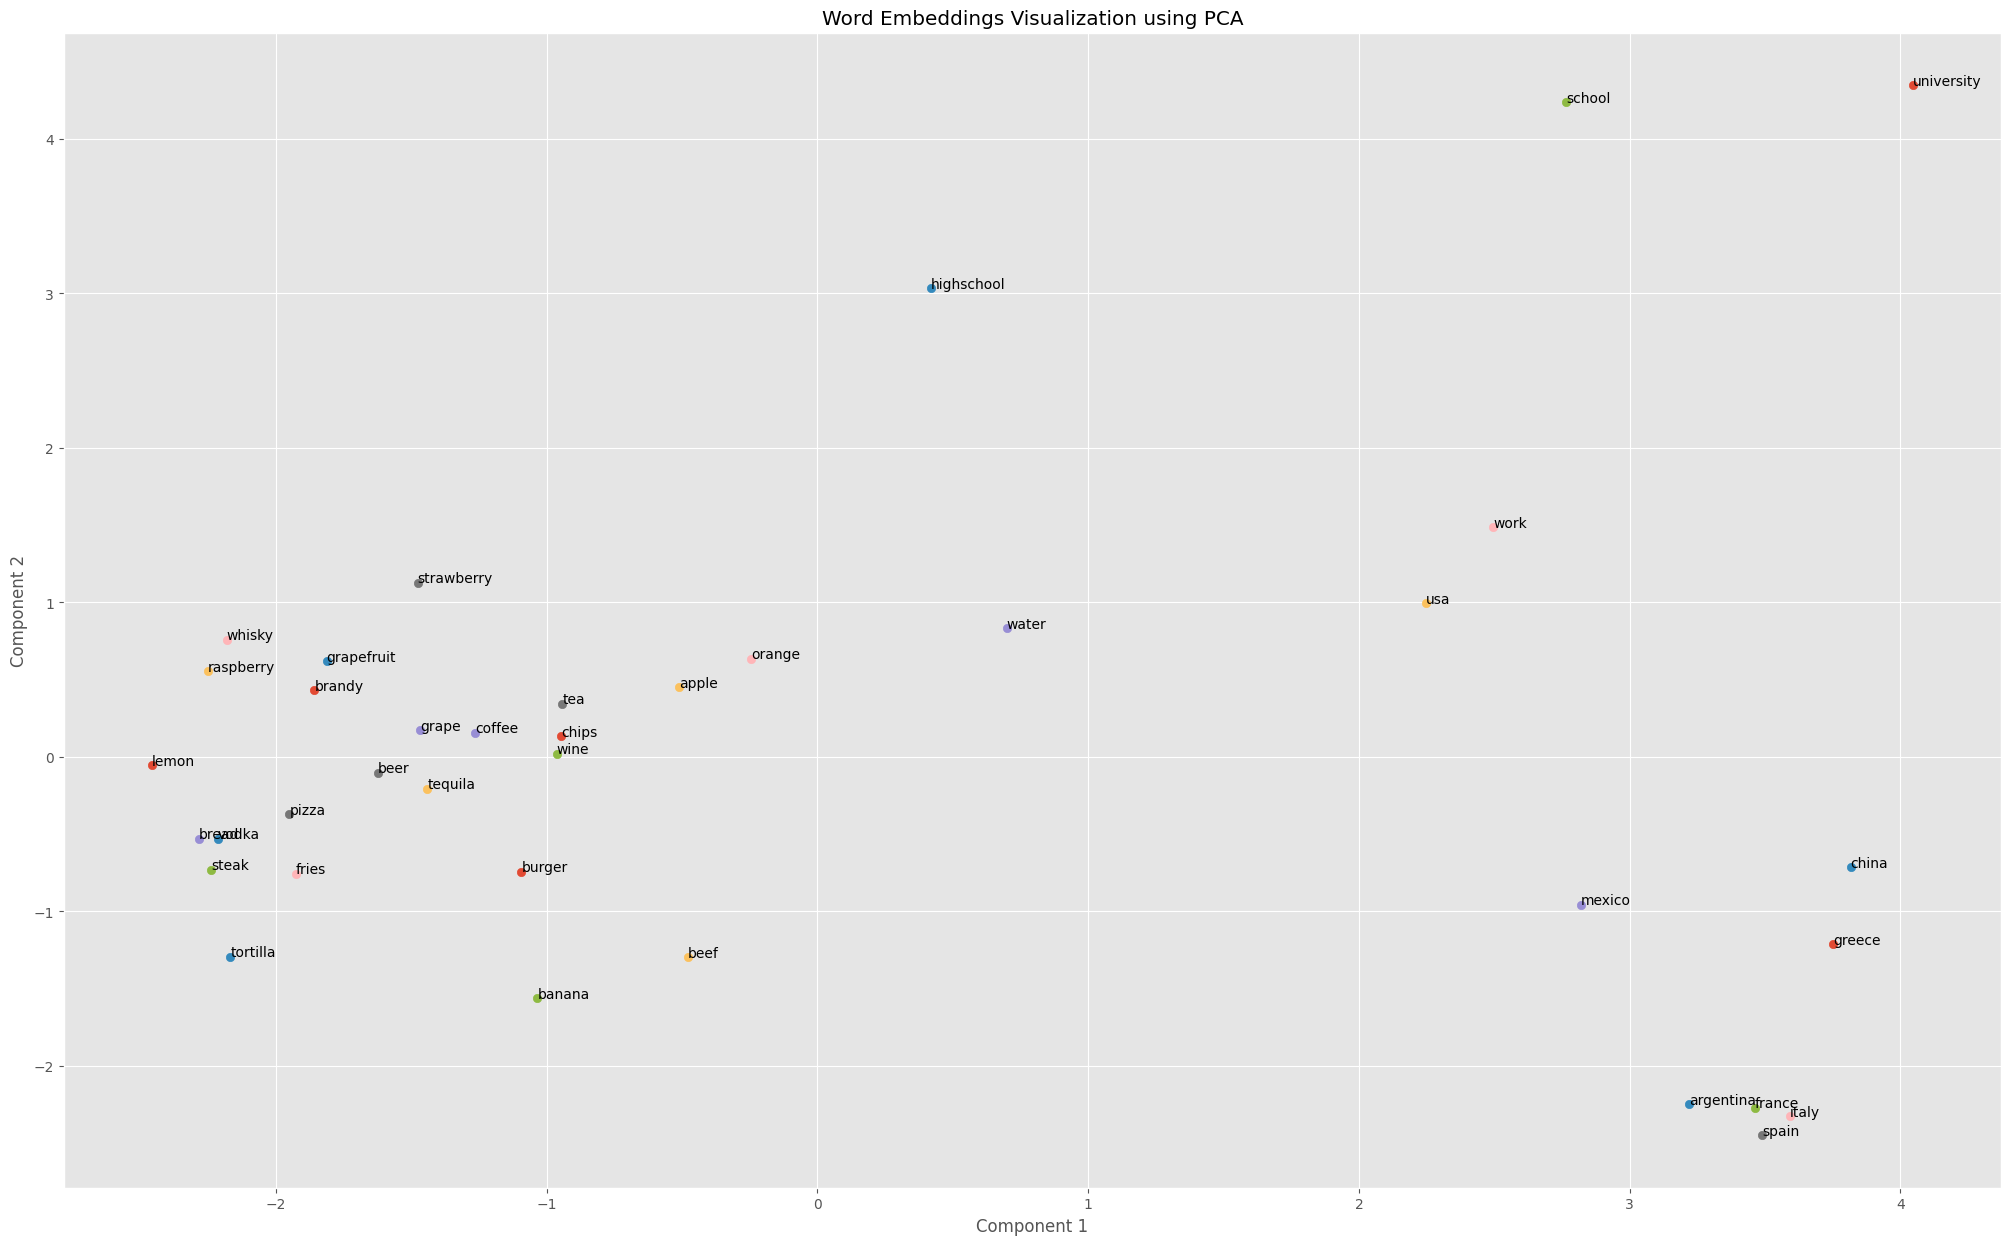

In [ ]:
#
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

Using PCA as the first dimensionality reduction technique we can observe interesting patterns in the data.

We observe clear clusters that reflect semantic relationships between different words. For instance, food-related words like "burger," "tortilla," "bread," "pizza," and "fries" are located close to each other, indicating that these embeddings capture the shared context of fast food and similar concepts.

Similarly, countries such as "Argentina," "Mexico," "Spain," "France," "Italy," and "Greece" form a distinct cluster, which suggests a geographical or cultural similarity captured by the embeddings.

Additionally, words associated with drinks, like "beer," "tequila," "wine," "whisky," and "vodka," appear in a separate grouping, highlighting the semantic relationship between alcoholic beverages.

The educational terms "school," "highschool," "university," and "work" also form a unique cluster, reflecting their conceptual proximity in language.

This visualization illustrates how PCA can reveal underlying relationships in word embeddings, grouping words with similar contexts and meanings.

**NOTE: To visualize better the resulting image, you can download the file and open it in your local machine.**

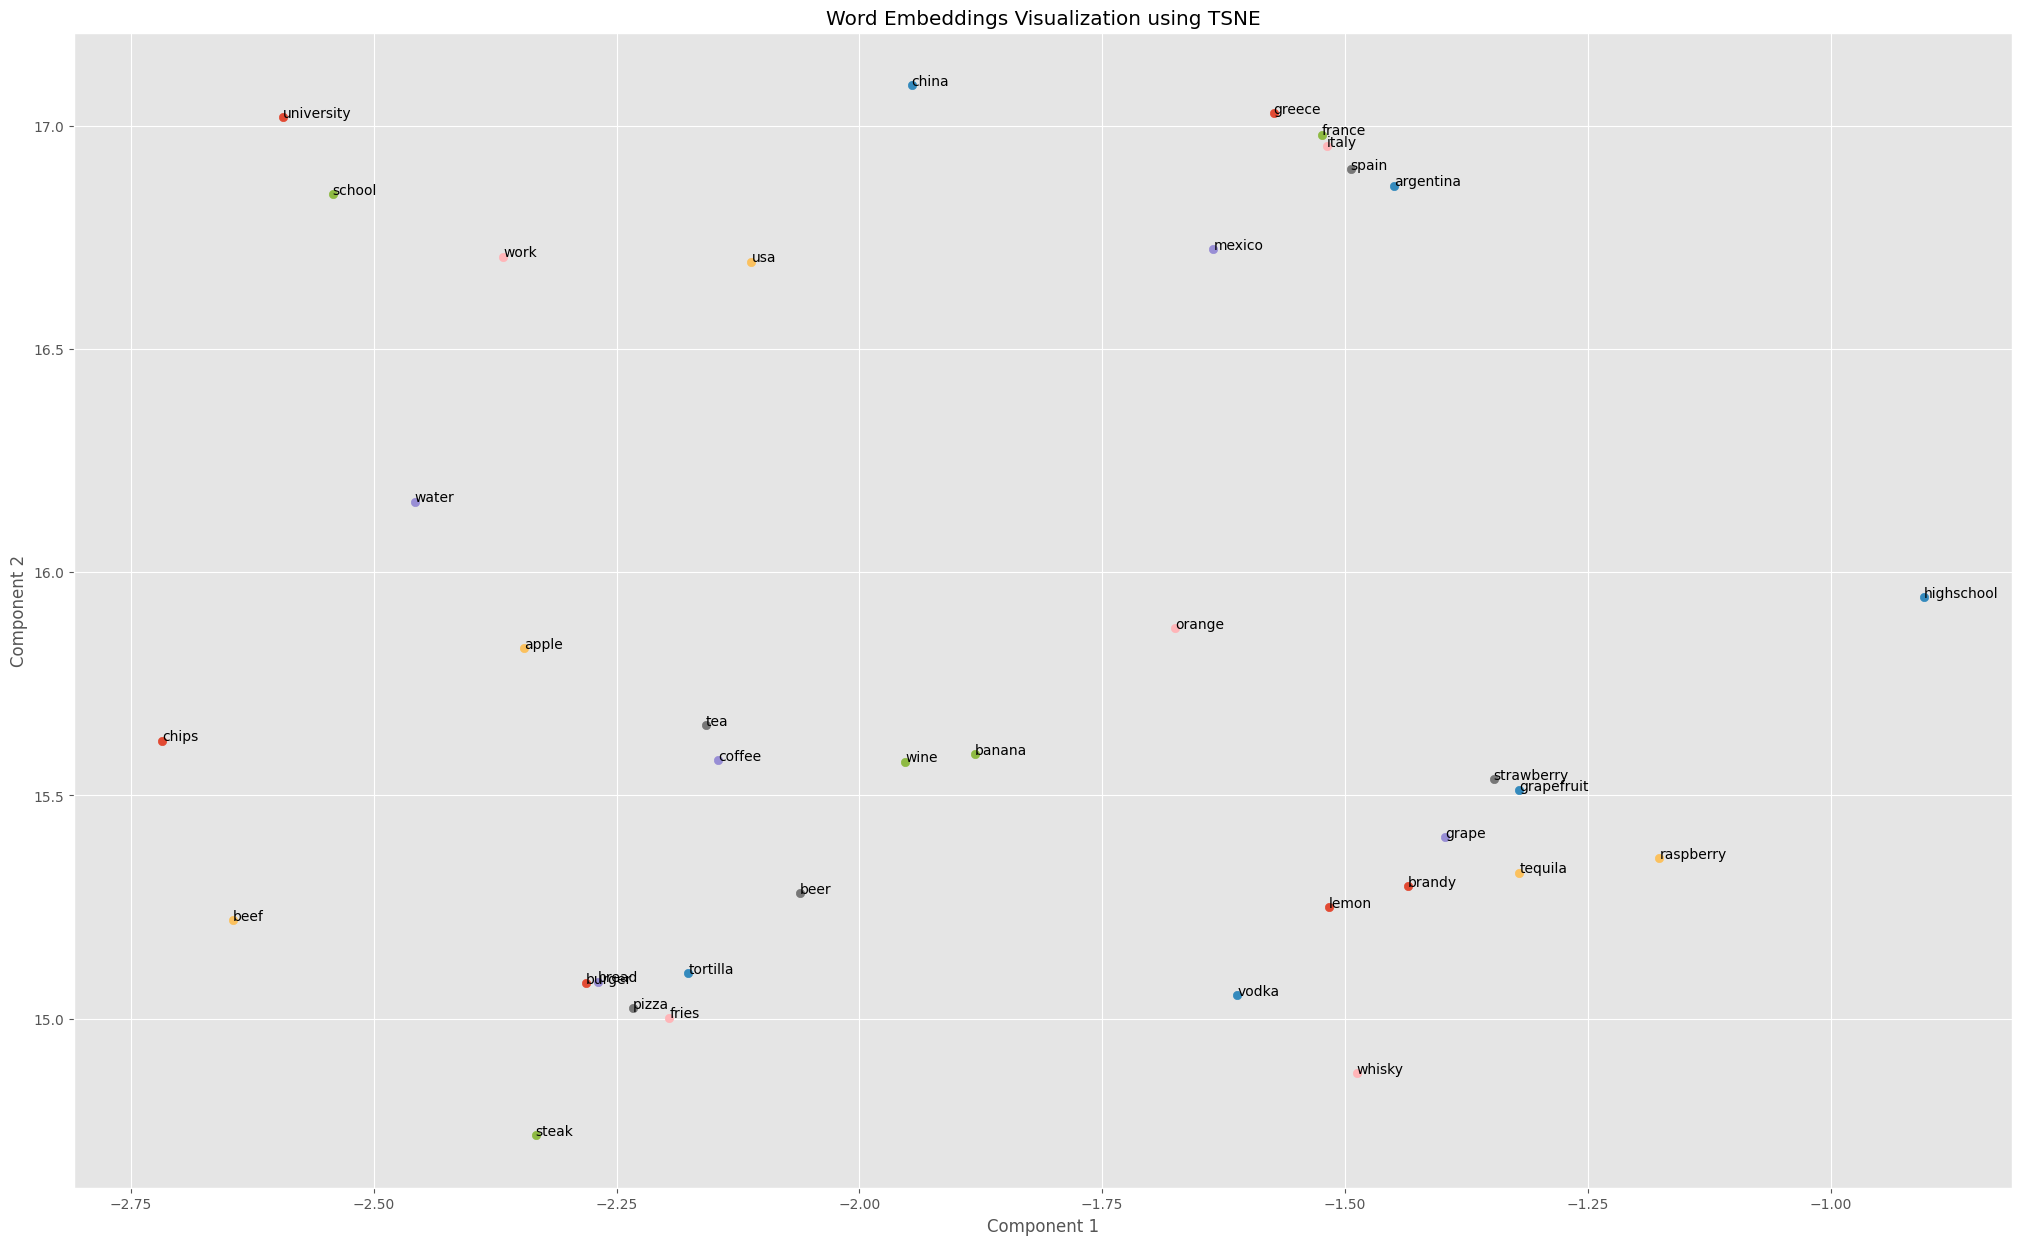

In [ ]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

In the t-SNE visualization of word embeddings, we see well-defined clusters that reveal intricate relationships between words.

The countries "Argentina," "Mexico," "Spain," "France," "Italy," and "Greece" form a compact cluster, showing their cultural or geographical similarity.

Food items such as "burger," "pizza," "tortilla," "fries," "steak," and "bread" are grouped together, while beverages, including "coffee," "tea," "wine," and "water," form a distinct cluster. Within the beverage cluster, alcoholic drinks like "whisky," "brandy," "vodka," and "tequila" are closer to each other, with fruits like "apple," "banana," "grape," and "orange" forming their own subgroup nearby.

Compared with the previous results in PCA, t-SNE provides a clearer separation between categories, allowing us to see these relationships more distinctly. This suggests that t-SNE may capture the nuanced semantic differences in word embeddings more effectively than PCA, making it especially useful for exploring complex relationships in high-dimensional data.

**NOTE: To visualize better the resulting image, you can download the file and open it in your local machine.**

### Let us compute analogies

To implement the method "analogy", we need to define a function that calculates the analogy between words.

The analogy is calculated as the difference between the vectors of the words in the following way:
    
$ analogy = vector(b) - vector(a) + vector(c) $
    
The word that is closest to the calculated analogy vector is considered the answer to the analogy.

The function below calculates the analogy between words using the embeddings dictionary.


In [ ]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
    # Check if the words are in the dictionary
    if any(word not in embeddings_dict for word in [word1, word2, word3]):
        return 'One or more words are not in the dictionary'

    # Calculate the analogy using the formula: word2 - word1 + word3
    analogy = embeddings_dict[word2] - embeddings_dict[word1] + embeddings_dict[word3]

    # To find the closest word to the analogy, the algorithm uses the Euclidean distance
    # between the analogy and the embeddings of each word in the dictionary
    # then returns the word with the smallest distance.

    # Initialize the minimum distance to infinity because we want to find the smallest distance
    min_distance = float('inf')
    closest_word = ''

    for word in embeddings_dict:
        # Check if the word is not one of the input words
        if word in [word1, word2, word3]:
            continue

        # To calculate the euclidean distance we use the norm function from numpy
        distance = norm(analogy - embeddings_dict[word])

        # If the distance is smaller than the current minimum distance
        if distance < min_distance:
            min_distance = distance
            closest_word = word

    # Return the closest word to the analogy
    return closest_word


In [ ]:
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

We will play with other examples to see how the function behaves. In this case, we will use the words 'country', 'capital', 'city' to calculate the analogy.

In [ ]:
analogy('country', 'capital', 'city', embeddings_dict)

'airport'

### Find the most similar words

To find the most similar words to a given word, we need to define a function that calculates the cosine similarity between the vector of the given word and the vectors of all other words.

The cosine similarity between two vectors $a$ and $b$ is calculated as follows:

$ similarity = \frac{a \cdot b}{||a|| \cdot ||b||} $

The following function calculates the cosine similarity between the vector of a given word and the vectors of all other words using the embeddings dictionary.



Reference:

TechClaw. (2021, April 8). Cosine similarity between two arrays for word embeddings. Medium. https://medium.com/@techclaw/cosine-similarity-between-two-arrays-for-word-embeddings-c8c1c98811b

In [ ]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    # Check if the word is in the dictionary
    if word not in embeddings_dict:
        return 'The word is not in the dictionary'

    # Calculate the similarity between the word and all the other words in the dictionary
    # The similarity is calculated using the cosine similarity.
    similarities = {}

    for w in embeddings_dict:
        # Check that the word is not the same as the input word
        if w == word:
            continue

        # Calculate cosine similarity using numpy and the given formula: A.B / (||A|| * ||B||)
        # First we calculate the dot product of the two vectors
        # Then we divide by the product of the norms of the two vectors
        similarity = np.dot(embeddings_dict[word], embeddings_dict[w]) / (norm(embeddings_dict[word]) * norm(embeddings_dict[w]))

        # Store the similarity in the dictionary, using the word as the key
        similarities[w] = similarity

    # Sort the words by similarity
    most_similar = sorted(similarities, key=similarities.get, reverse=True)

    # Return the top n most similar words
    return most_similar[:top_n]

In [ ]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [ ]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


We tried with other examples using the method find_most_similar to see how the function behaves. In this case, we will use the word 'king' to find the most similar words.

In [ ]:
most_similar_2 = find_most_similar('king', embeddings_dict)

for i, w in enumerate(most_similar_2, 1):
    print(f'{i} ---> {w}')

1 ---> prince
2 ---> queen
3 ---> ii
4 ---> emperor
5 ---> son
6 ---> uncle
7 ---> kingdom
8 ---> throne
9 ---> brother
10 ---> ruler


And as a third example, we will use the word 'apple' to find the most similar words.

In [ ]:
most_similar_3 = find_most_similar('apple', embeddings_dict)

for i, w in enumerate(most_similar_3, 1):
    print(f'{i} ---> {w}')

1 ---> blackberry
2 ---> chips
3 ---> iphone
4 ---> microsoft
5 ---> ipad
6 ---> pc
7 ---> ipod
8 ---> intel
9 ---> ibm
10 ---> software


It's interesting to see the results of this experiments, becuase we can see in some cases unexpected results. This is in part because the embeddings are based on the context in which the words appear, and this data base has a limited number of words and contexts. So, the results are not perfect, but they are good enough to show the power of word embeddings.

### Conclusion

In this practice, we explored the concept of word embeddings and their applications in Natural Language Processing. By using pre-trained GloVe embeddings, we gained hands-on experience in manipulating high-dimensional data, performing dimensionality reduction with PCA and t-SNE, and visualizing word relationships in a lower-dimensional space.

Implementing the word similarity and analogy functions without relying on pre-built libraries provided us with a more profound understanding of cosine similarity and vector arithmetic in capturing semantic relationships between words. For example, we observed how words with similar meanings clustered together in reduced-dimensional space, and how analogy tasks could reveal inherent relationships like “king” to “queen” or “city” to “airport”

This exercise reinforced the value of word embeddings in NLP by showing us how these vector representations capture subtle, complex relationships in language. As a team, we learned the importance of data preprocessing, managing high-dimensional data, and using vector-based mathematics to uncover insights. This foundational knowledge will be valuable for future projects that involve embedding-based models or require understanding relationships within textual data.

Overall, this practice has equipped us with both theoretical and practical insights into embeddings, dimensionality reduction, and the power of vector operations in NLP tasks.

